In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('all') # Download only required or all -> press d, type all, type quit after
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords # not using these stopwords, still may be useful in the future
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, accuracy_score, f1_score, confusion_matrix, recall_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [2]:
train_path = "training.csv"
val_path = "validation.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

In [3]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]  

In [13]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Oranges", ax=ax, colorbar=False)
    plt.show()

In [5]:
train_df['tokenized'] = train_df.apply(lambda x: tokenize(x['text']), axis=1)
val_df['tokenized'] = val_df.apply(lambda x: tokenize(x['text']), axis=1)
test_df['tokenized'] = test_df.apply(lambda x: tokenize(x['text']), axis=1)

In [6]:
lmtzr = WordNetLemmatizer()
train_df['lemmatized'] = train_df['tokenized'].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
val_df['lemmatized'] = val_df['tokenized'].apply(
                   lambda lst:[lmtzr.lemmatize(word) for word in lst])
test_df['lemmatized'] = test_df['tokenized'].apply(
                   lambda lst:[lmtzr.lemmatize(word) for word in lst])

In [7]:
train_labels = np.array(train_df['label'])
val_labels = np.array(val_df['label'])
test_labels = np.array(test_df['label'])

In [8]:
Encoder = LabelEncoder()
train_labels = Encoder.fit_transform(train_labels)
val_labels = Encoder.fit_transform(val_labels)
test_labels = Encoder.fit_transform(test_labels)

In [9]:
Tfidf_vect = TfidfVectorizer(max_features=5000, stop_words='english')
train_X_Tfidf = Tfidf_vect.fit_transform(train_df['lemmatized'].apply(lambda x: ' '.join(x)))
test_X_Tfidf = Tfidf_vect.transform(test_df['lemmatized'].apply(lambda x: ' '.join(x)))
val_X_Tfidf = Tfidf_vect.transform(val_df['lemmatized'].apply(lambda x: ' '.join(x)))

Accuracy Score ->  83.05


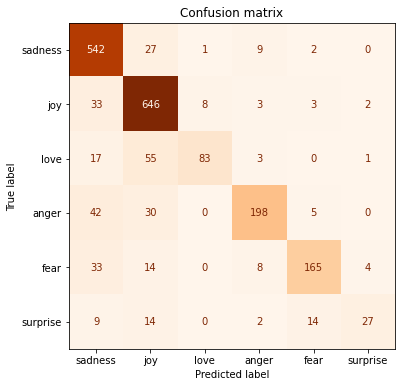

In [12]:
# change value: 3,5,7,11,13,17,19,23,29,31,37,41,43,47
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(train_X_Tfidf, train_labels)

prediction = knn.predict(test_X_Tfidf)

print("Accuracy Score -> ",accuracy_score(prediction, test_labels)*100)
labels = ["sadness","joy", "love", "anger", "fear","surprise"]
plot_confusion_matrix(prediction,test_labels, labels)